# Benchmark Systems Spread


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Column 1: MixingKerkerFactor, Column 2: Mixing Coefficient, with defaults (1.0, 0.03)


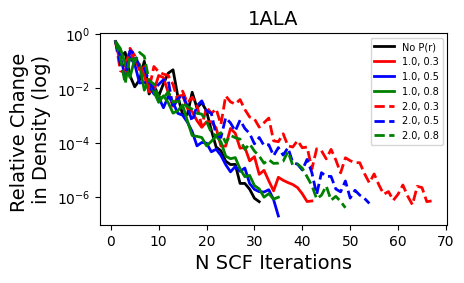

In [22]:
"""SCF Convergence on Benchmark Suite, with various settings
"""
import os
from typing import List

from octopus_workflows.components import cartesian_product
from oct_utils import parse_convergence_calculations, plot_convergence

%load_ext autoreload
%autoreload 2



def get_settings_strings(matrix: dict) -> List[str]:
    """
    
    :param matrix: 
    :return: 
    """
    options = cartesian_product(matrix)
    settings_strs = []
    for settings in options:
        settings_strs.append("".join(str(x) + '_' for x in settings.values())[:-1])
    return settings_strs


notebook_dir = os.path.abspath(os.path.dirname("__file__"))
root = os.path.join(notebook_dir, '..', 'results')

# TODO Alex. Extend these options once the calcs are run and copied over
systems = ['1ALA']
settings_matrix = {'MixingKerkerFactor': [1.0, 2.0], 'Mixing': [0.3, 0.5, 0.8]}

# Line type and colour w.r.t. MixingKerkerFactor and Mixing
line_type = {'1.0': '-', '2.0': '--', '4.0': '-.'}
line_colour = {'0.3': 'r', '0.5': 'b', '0.8': 'g'}

# Parse and store data 
settings_strings = get_settings_strings(settings_matrix)
system_calcs = {}

for system in systems:
    # Initialise calcs list for system entry
    system_calcs[system] = []
    
    # Parsing of systems without preconditioning here
    dir = [root + '/no_preconditioning/broyden/' + system]
    calc: dict = parse_convergence_calculations(dir)
    # Flatten out the result of the parser
    new_calc = {}
    new_calc['key'] = list(calc)[0]
    new_calc['plot_options'] = {'label': 'No P(r)',
                             'ls': '-',
                             'lw': 2,
                             'color': 'black'
                             }
    new_calc.update(calc[new_calc['key']])
    system_calcs[system].append(new_calc)
        
    # Preconditioning calcs
    for settings_str in settings_strings:
        dir = [root + '/preconditioning_potential_spread/' + system + '_' + settings_str]
        calc: dict = parse_convergence_calculations(dir)
        # Flatten out the result of the parser
        new_calc = {}
        new_calc['key'] = list(calc)[0]
        new_calc.update(calc[new_calc['key']])
        ls, lc = settings_str.split('_')
        new_calc['plot_options'] = {'label': ls + ', ' + lc,
                                 'ls': line_type[ls],
                                 'lw': 2,
                                 'color': line_colour[lc]
                                 }
        system_calcs[system].append(new_calc)


# Plot calculations
n_cols = 2
common_settings = {'label_size': 10, 
                   'font_size': 14, 
                   'legend_fsize': 7,                                 
                   'xlabel': 'N SCF Iterations', 
                   'ylabel': 'Relative Change \nin Density (log)'
                   #'title': "Effect of Kerker preconditioning, mixing with potentials"
                   # Cannot get it to not overlap the subplots
                   }

print('Column 1: MixingKerkerFactor, Column 2: Mixing Coefficient, with defaults (1.0, 0.03)')
fig, axes = plot_convergence(system_calcs, n_cols, common_settings)
